**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn import svm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

***Load Datasets***

In [ ]:
data_df = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")


In [ ]:
data_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<ipython-input-5-73a53110685c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="DEATH_EVENT",data=data_df,palette=cols)


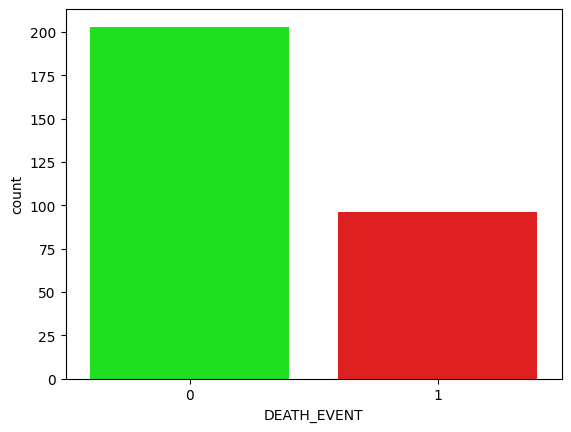

In [ ]:
cols = ["#00FF00","#FF0000"]
ax = sns.countplot(x="DEATH_EVENT",data=data_df,palette=cols)
plt.show()

In [ ]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


<Axes: >

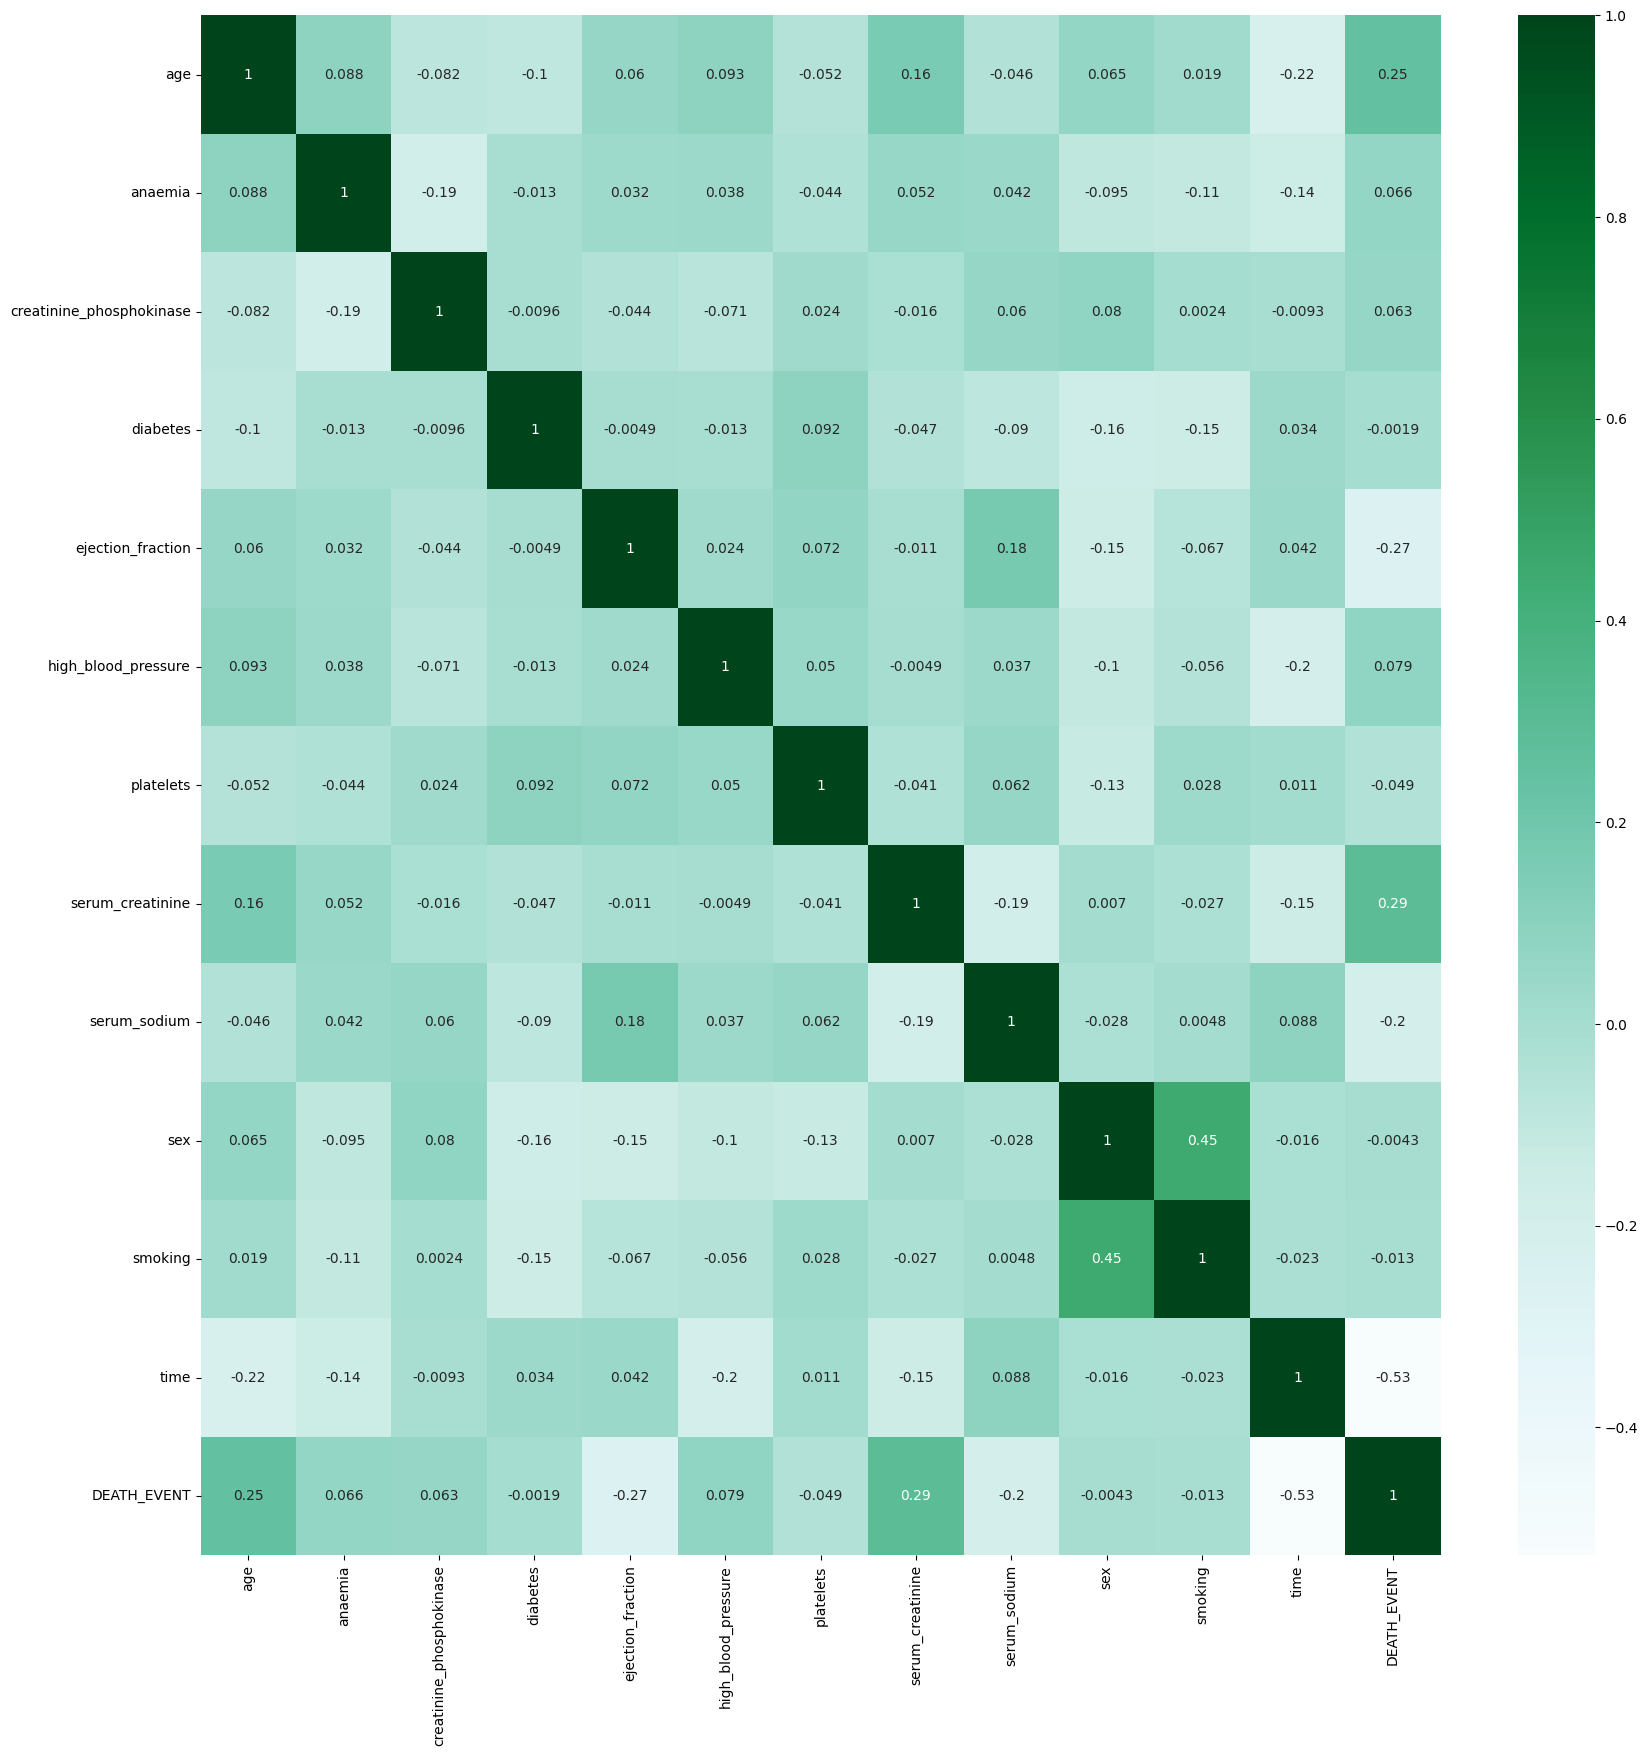

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data_df.corr(),annot=True, cmap ="BuGn")

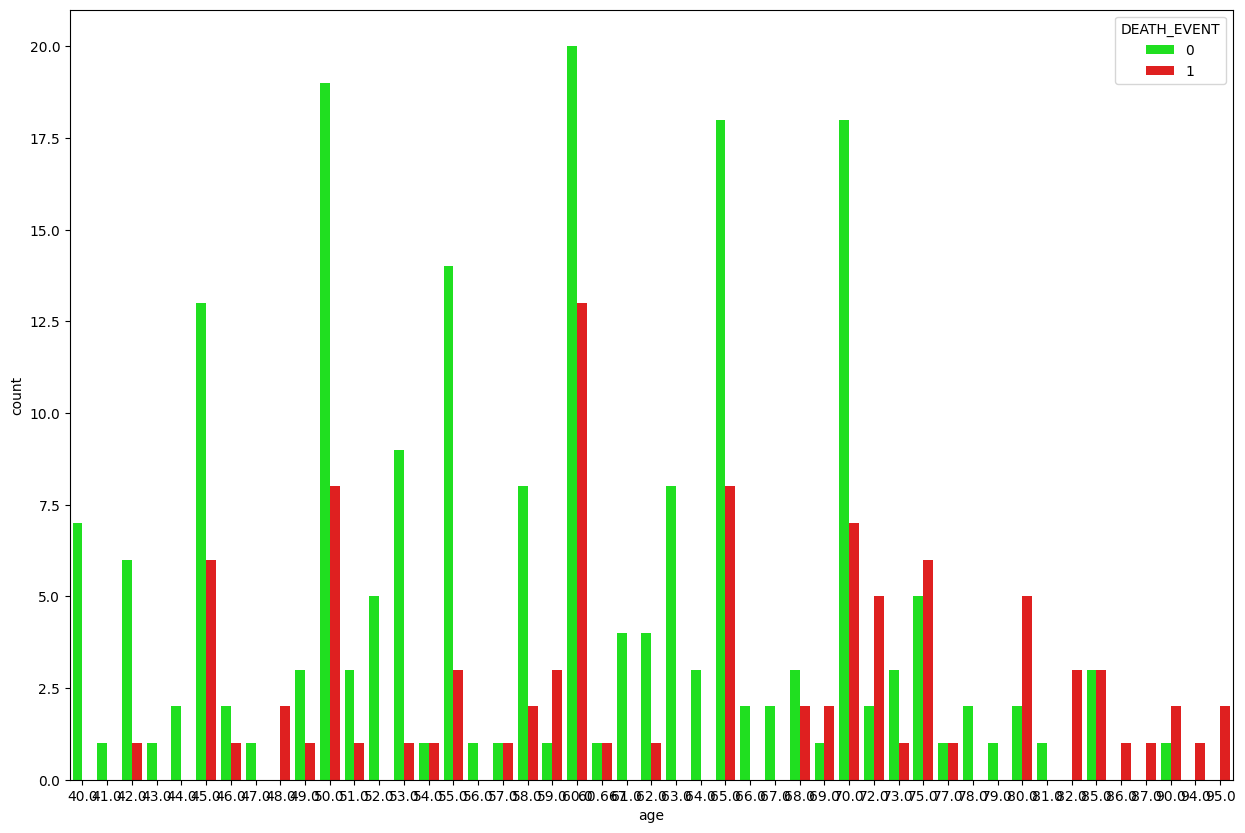

In [ ]:
plt.figure(figsize=(15, 10))
days_of_week = sns.countplot(x=data_df['age'], data=data_df, hue="DEATH_EVENT", palette = cols)

<ipython-input-43-5ce024438e4e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x="DEATH_EVENT", y=i, data=data_df, palette=cols)
<ipython-input-43-5ce024438e4e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x="DEATH_EVENT", y=i, data=data_df, palette=cols)
<ipython-input-43-5ce024438e4e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x="DEATH_EVENT", y=i, data=data_df, palette=cols)
<ipython-input-43-5ce024438e4e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

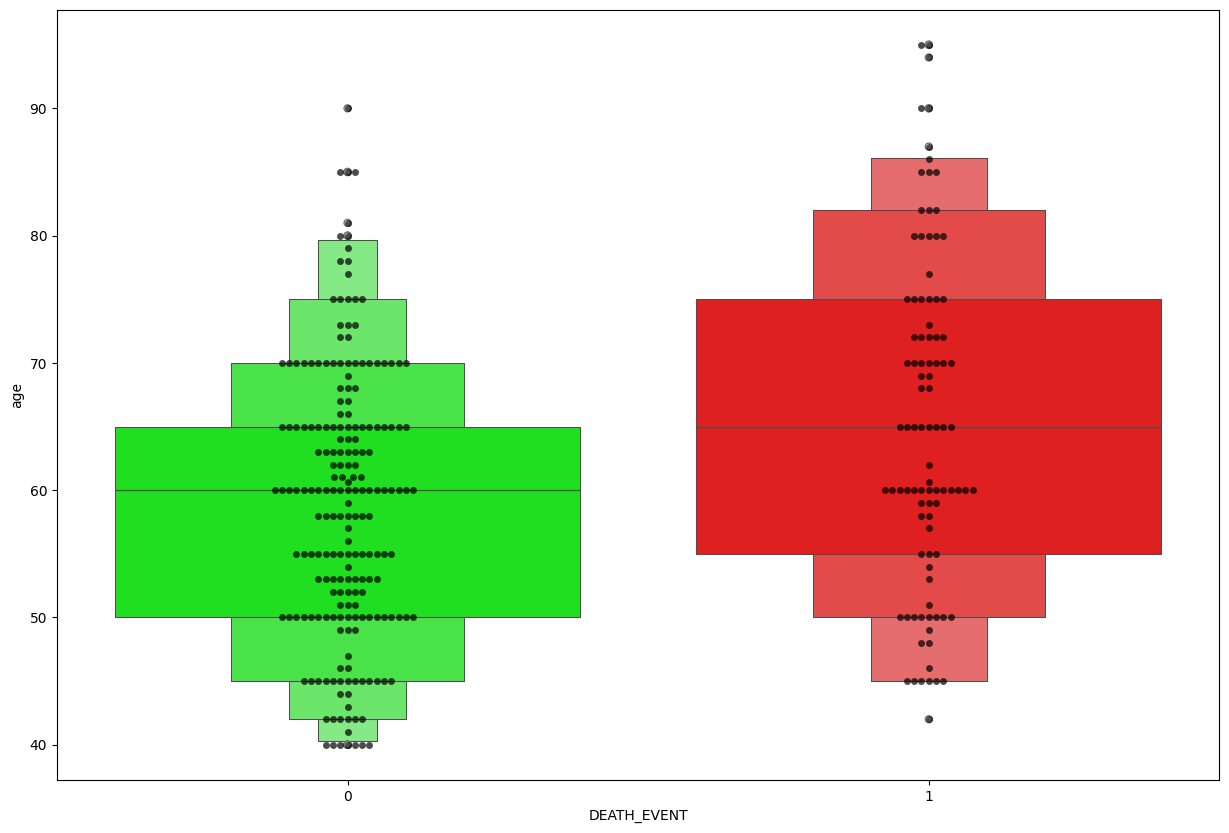

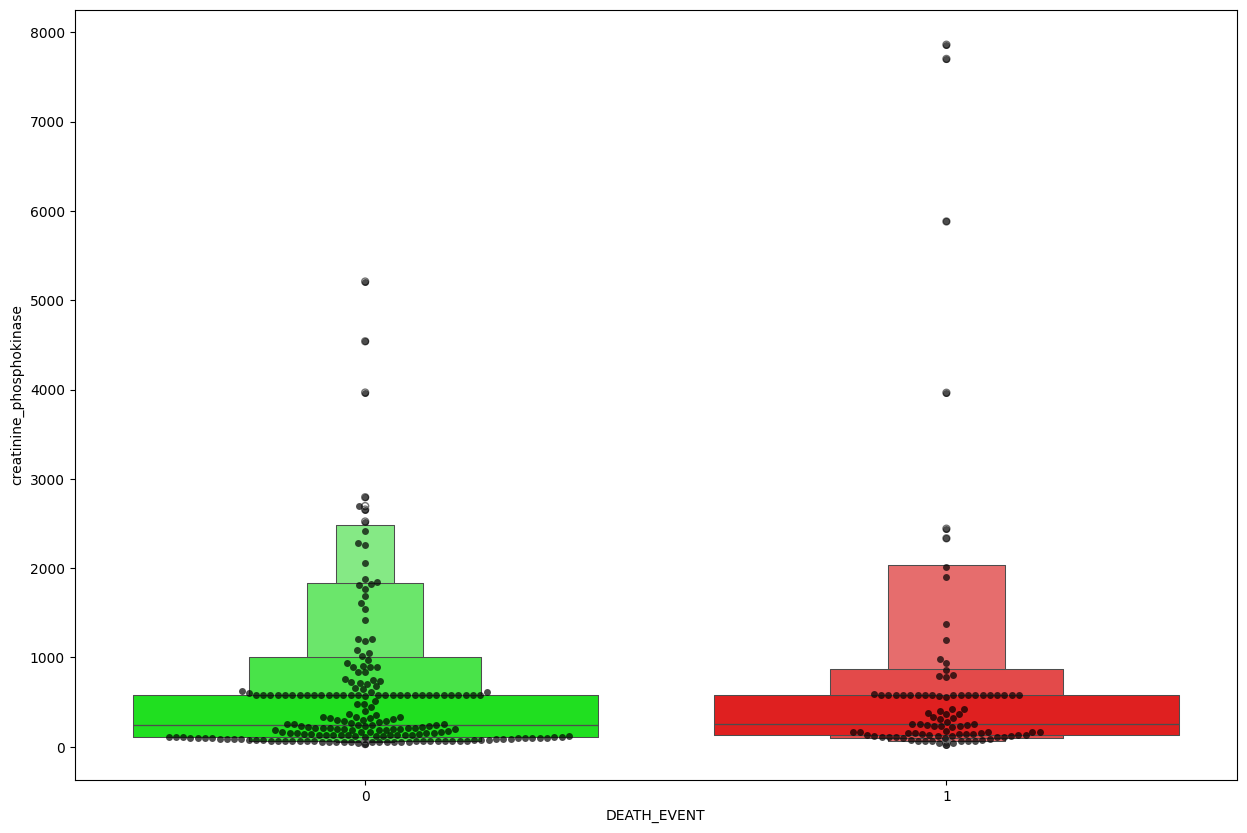

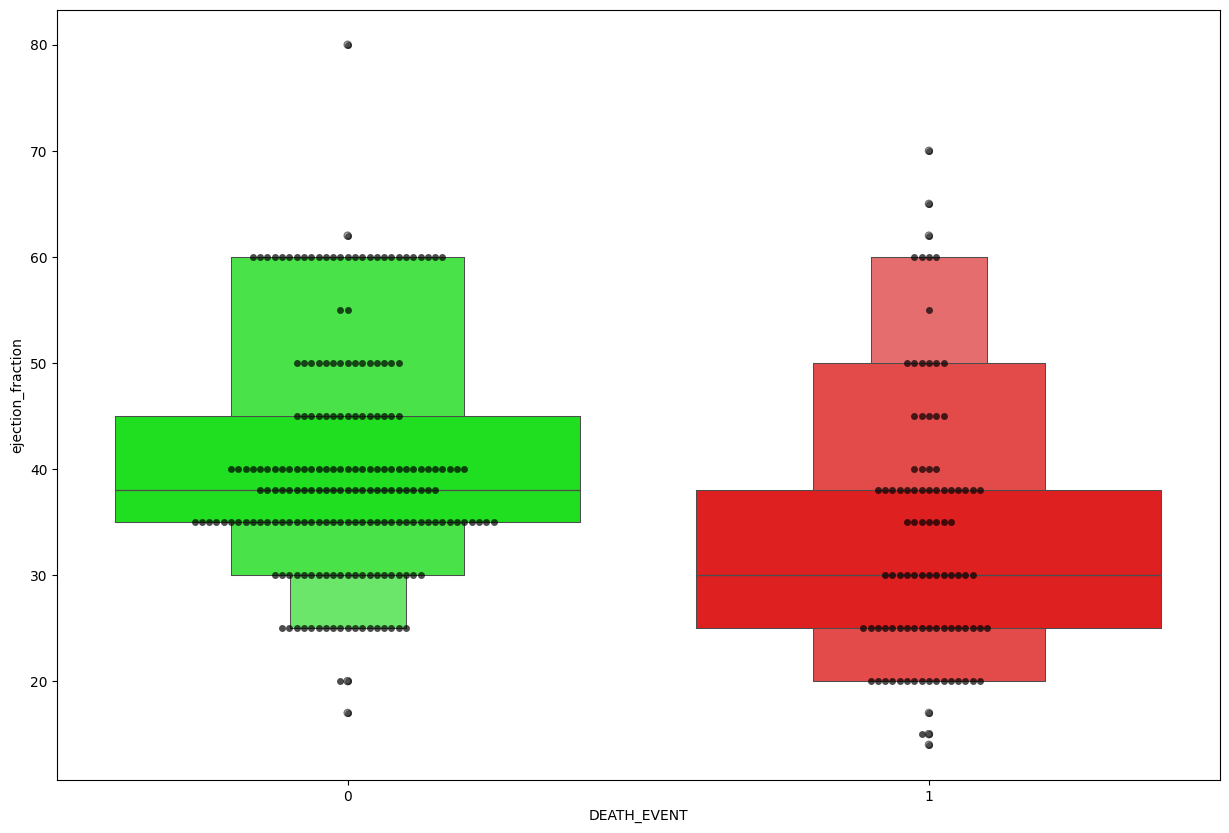

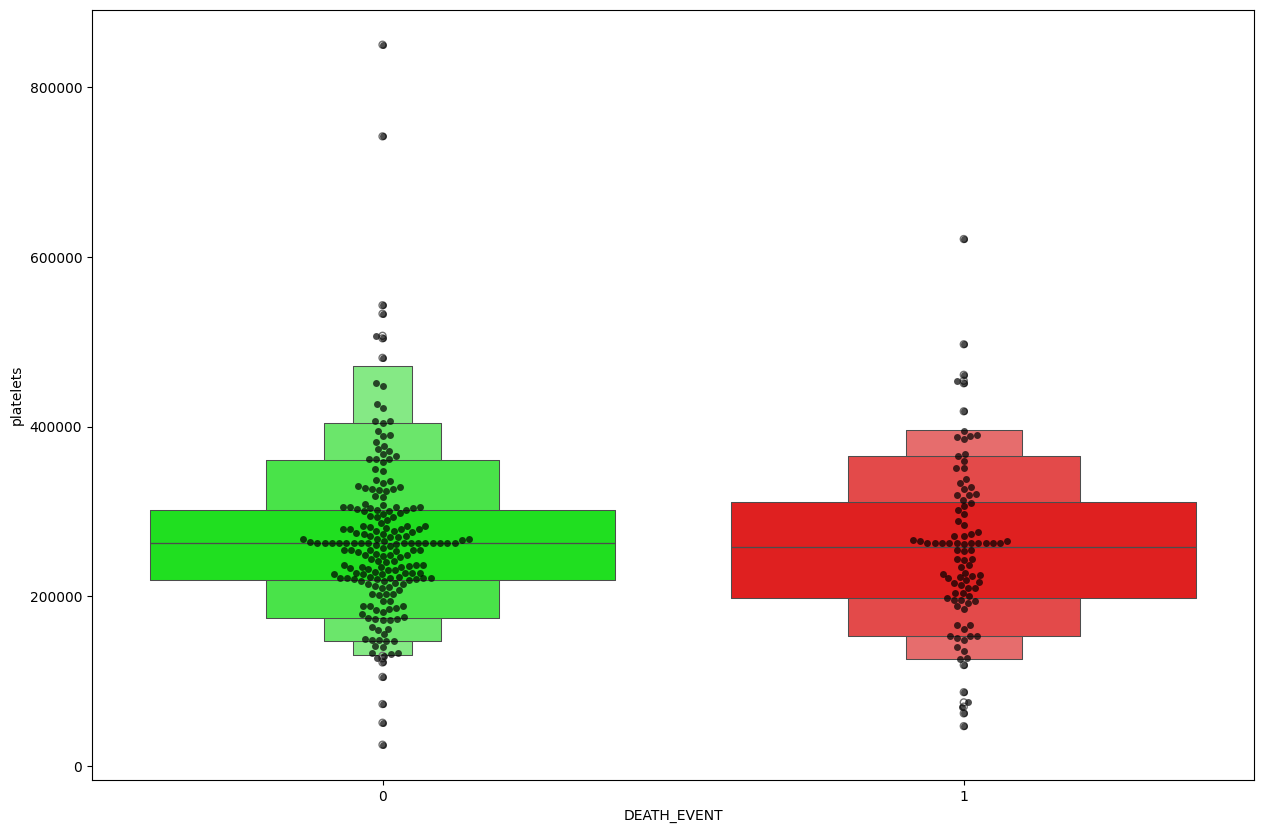

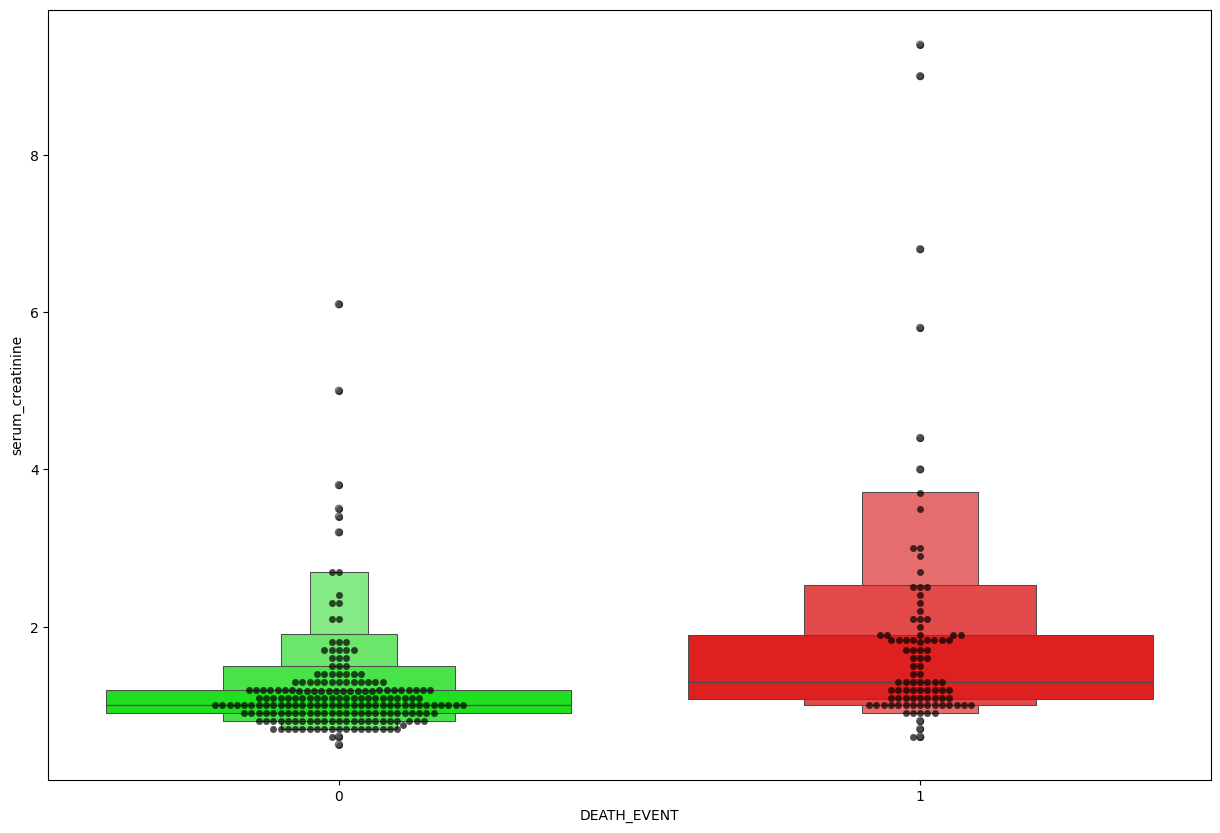

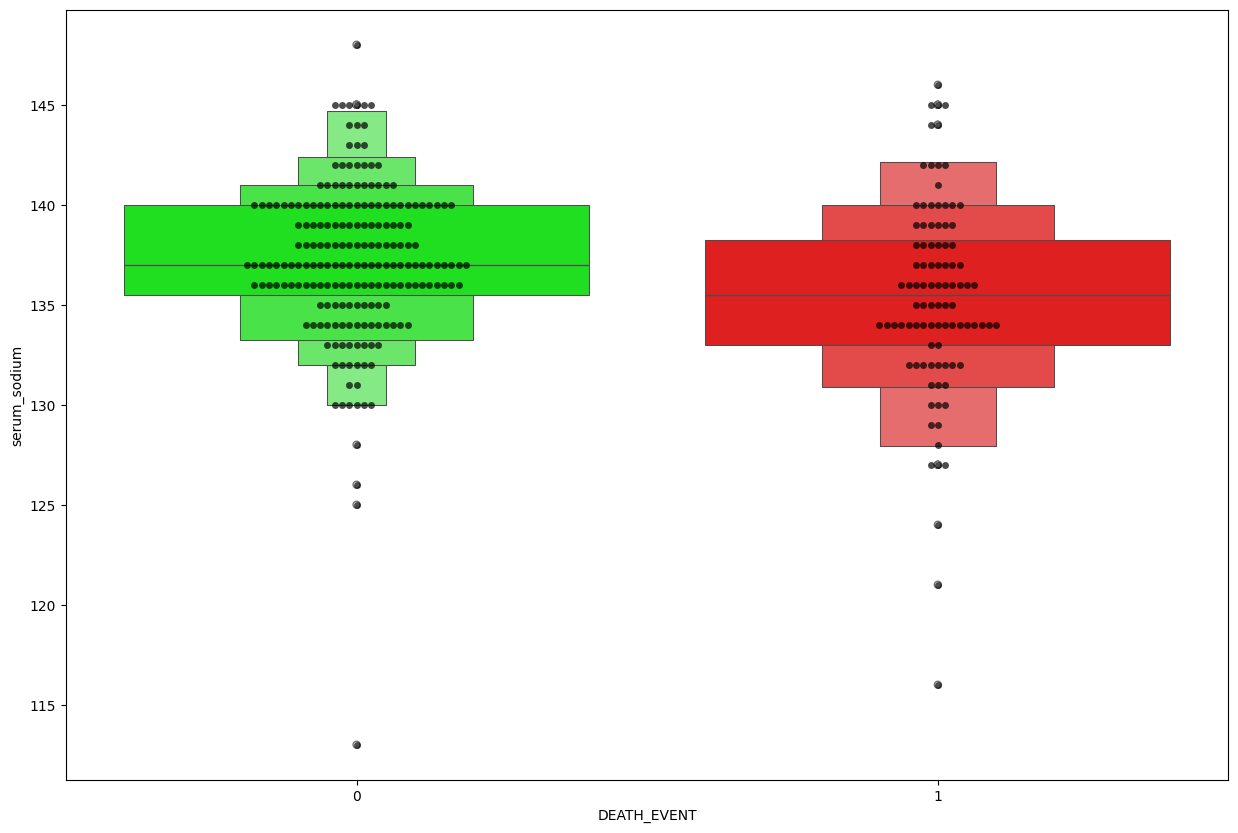

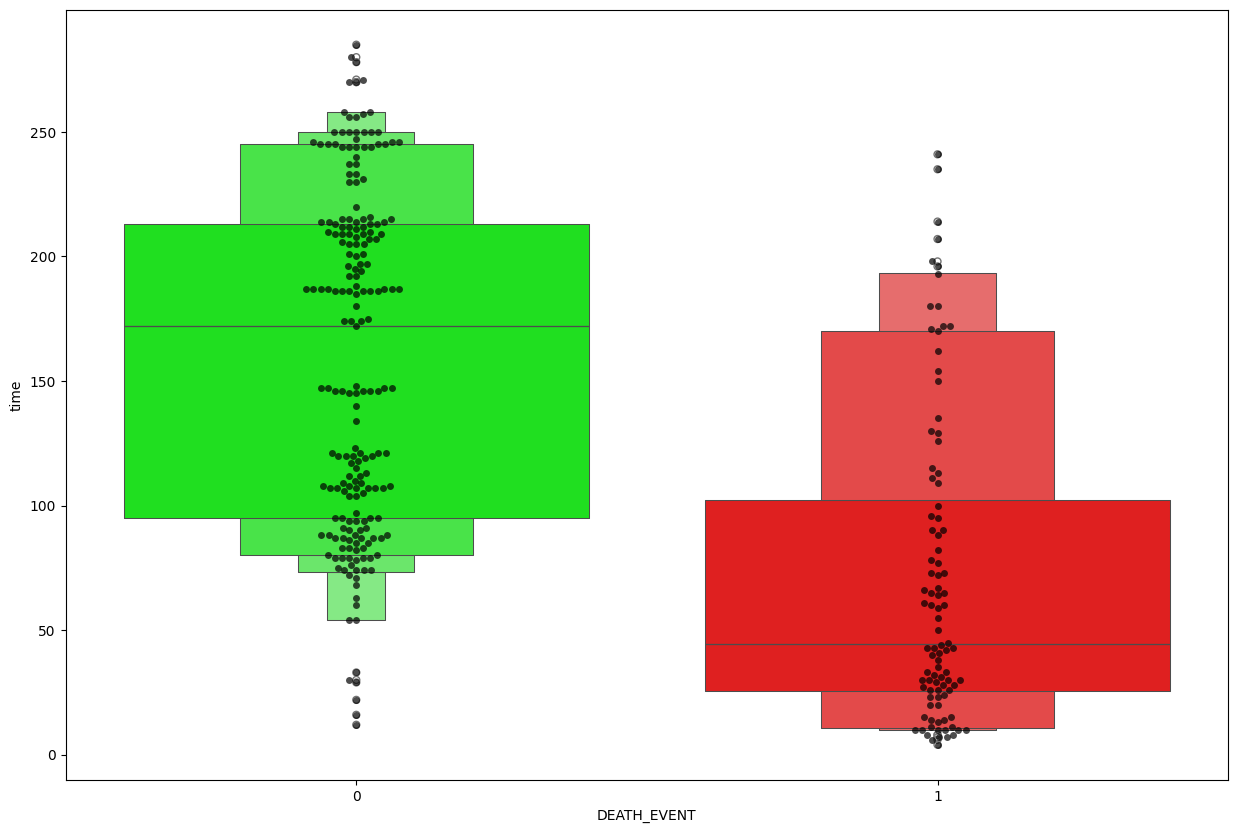

In [ ]:
feature =["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]
for i in feature:
  plt.figure(figsize=(15, 10))
  sns.swarmplot(x="DEATH_EVENT", y=i, data=data_df,color = "black",alpha = 0.7)
  sns.boxenplot(x="DEATH_EVENT", y=i, data=data_df, palette=cols)

**Data Preprocessing**

In [ ]:
X = data.drop("DEATH_EVENT", axis=1)
y = data_df["DEATH_EVENT"]

In [ ]:
col_name = list(X.columns)
s_scaler = StandardScaler()
X_scaled = s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X, columns=col_name)

In [ ]:
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


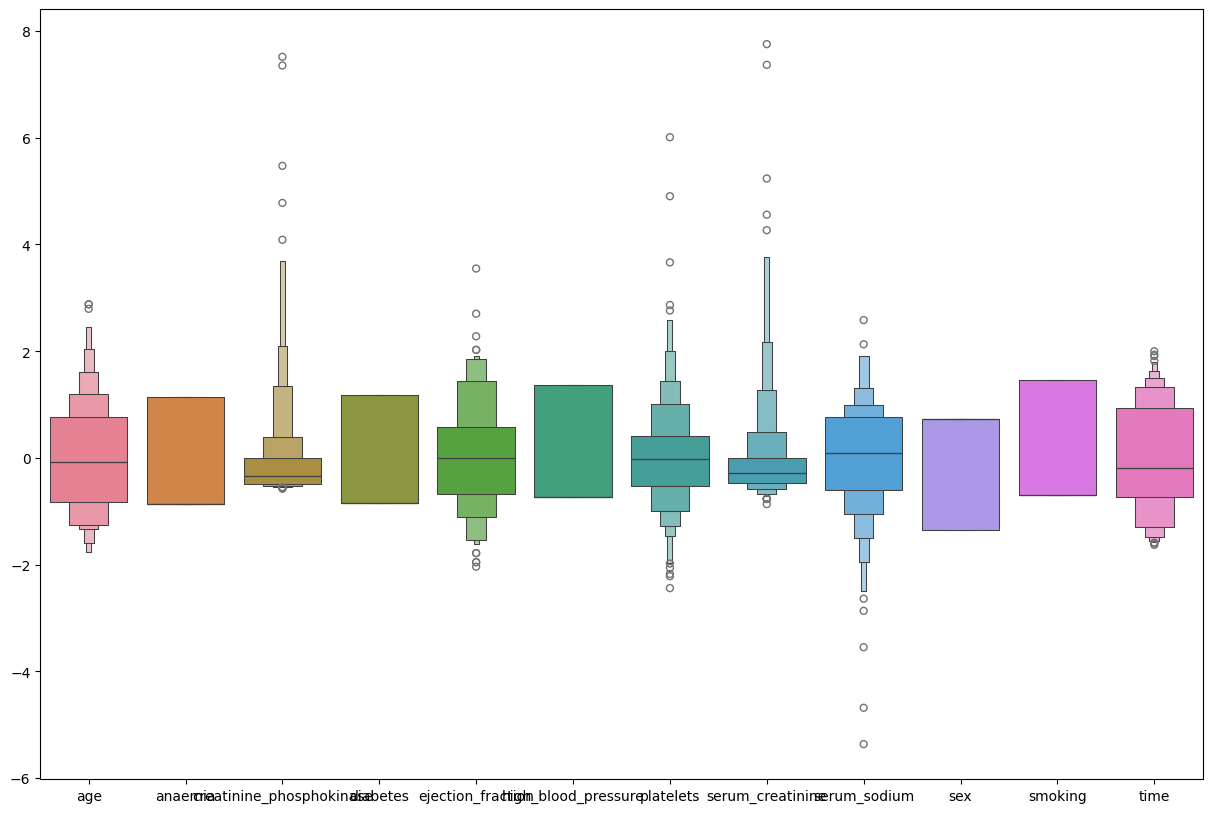

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxenplot(data=X_scaled)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)
if X_train.size == 0 or y_train.size == 0:
    raise ValueError("X_train or y_train is empty after transformation. Check your data and selector.")
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Type of X_train:", X_train.dtype)
print("Type of y_train:", y_train.dtype)


Shape of X_train: (209, 12)
Shape of y_train: (209,)
Type of X_train: float64
Type of y_train: int64


**Model building**

In [ ]:
model1 = svm.SVC()

In [ ]:
model1.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = model1.predict(X_test)

In [ ]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1])

In [ ]:
y_test

,DEATH_EVENT
75,1
233,0
23,0
276,0
122,0
...,...
294,0
176,0
99,0
94,0


In [ ]:
y_train

,DEATH_EVENT
38,0
259,0
186,1
158,0
203,0
...,...
71,0
151,0
229,0
40,1


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        61
           1       0.81      0.45      0.58        29

    accuracy                           0.79        90
   macro avg       0.80      0.70      0.72        90
weighted avg       0.79      0.79      0.77        90



In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)
model = Sequential()
model.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=12))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 16)                  │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 425 (1.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.25, callbacks=[early_stopping])

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.6631 - loss: 0.6928 - val_accuracy: 0.6792 - val_loss: 0.6919
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6839 - loss: 0.6916 - val_accuracy: 0.6792 - val_loss: 0.6907
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6821 - loss: 0.6904 - val_accuracy: 0.6792 - val_loss: 0.6894
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7093 - loss: 0.6885 - val_accuracy: 0.6792 - val_loss: 0.6880
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6955 - loss: 0.6871 - val_accuracy: 0.6792 - val_loss: 0.6863
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6641 - loss: 0.6865 - val_accuracy: 0.6792 - val_loss: 0.6846
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7188 - loss: 0.6822 - val_accuracy: 0.6792 - val_loss: 0.6824
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7291 - loss: 0.6790 - val_accuracy: 0.6792 - val_loss:

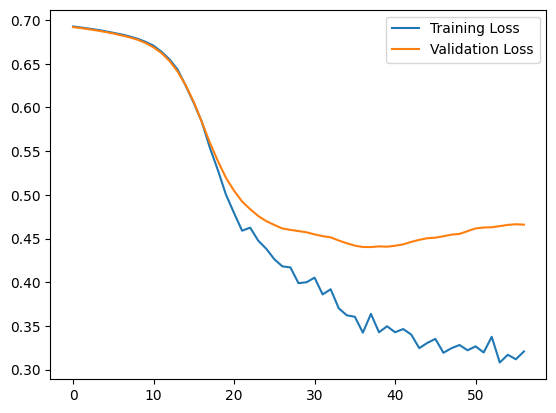

In [ ]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

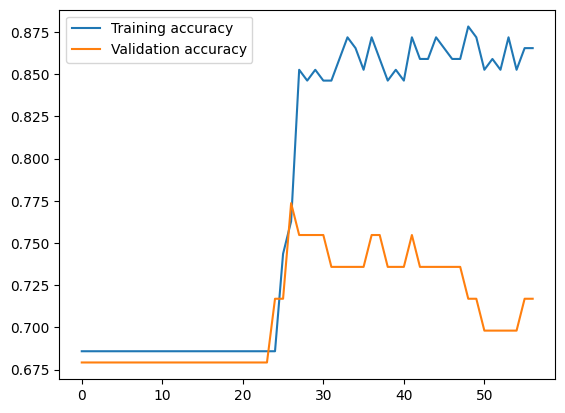

In [ ]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df['accuracy'], label='Training accuracy')
plt.plot(history_df['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
y_pred = (y_pred > 0.5)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        60
           1       0.73      0.80      0.76        30

    accuracy                           0.83        90
   macro avg       0.81      0.82      0.82        90
weighted avg       0.84      0.83      0.84        90



**Perform ANOVA to select top k features**

In [ ]:
selector = SelectKBest(score_func=f_classif, k=12)
X_selected = selector.fit_transform(X, y)


anova_scores = selector.scores_


feature_scores = pd.DataFrame({"Feature": X.columns, "ANOVA F-score": anova_scores})
feature_scores = feature_scores.sort_values(by="ANOVA F-score", ascending=False)
print("ANOVA F-scores:")
print(feature_scores)

ANOVA F-scores:
                     Feature  ANOVA F-score
11                      time     114.181264
7           serum_creatinine      28.158492
4          ejection_fraction      23.094063
0                        age      20.435946
8               serum_sodium      11.765331
5        high_blood_pressure       1.881937
1                    anaemia       1.310096
2   creatinine_phosphokinase       1.173259
6                  platelets       0.718880
10                   smoking       0.047333
9                        sex       0.005534
3                   diabetes       0.001121


In [ ]:
selector = SelectKBest(score_func=f_classif, k=12)
X_selected = selector.fit_transform(X, y)

selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)

X_scaled = s_scaler.fit_transform(X_selected_df)
X_scaled = pd.DataFrame(X_scaled, columns=X_selected_df.columns)

**Scale the entire dataset**

In [ ]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [ ]:
col_name = list(X.columns)
s_scaler = StandardScaler()
X_scaled = s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_name)


**Logistic Regression**

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)


**Decision Tree**

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

**Random Forest**

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

** Compare models using Confusion Matrix**

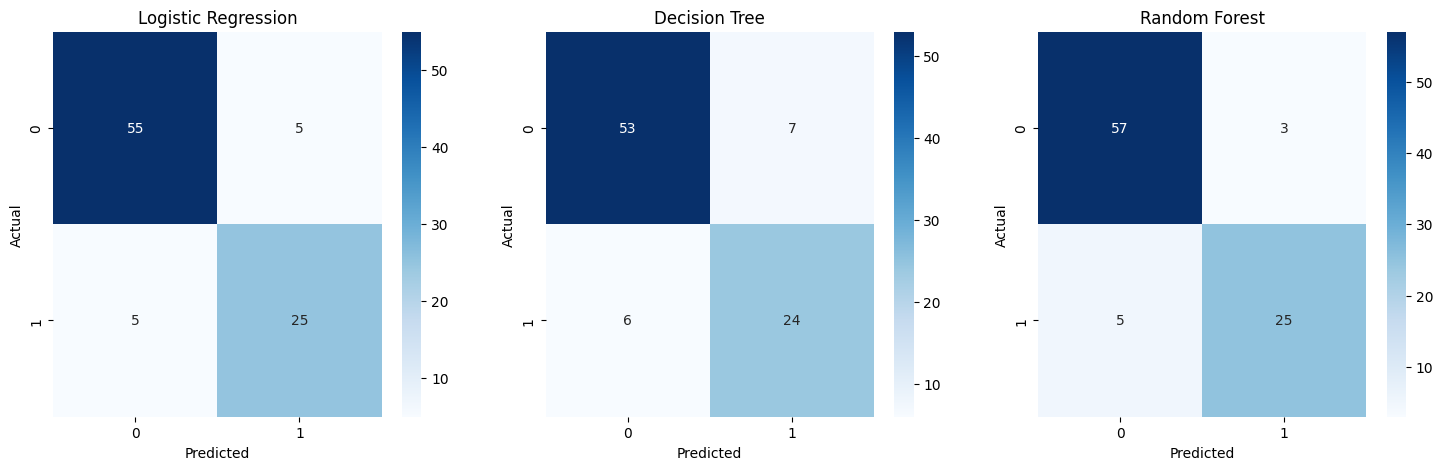

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
models = [("Logistic Regression", y_pred_log), ("Decision Tree", y_pred_dt), ("Random Forest", y_pred_rf)]
for i, (title, y_pred) in enumerate(models):
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(title)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.show()

**Hyperparameter tuning with cross-validation**

In [ ]:
param_grid_log = {"C": [0.01, 0.1, 1, 10]}
gs_log = GridSearchCV(LogisticRegression(), param_grid_log, cv=5)
gs_log.fit(X_train_scaled, y_train)
best_log_model = gs_log.best_estimator_
print("Best Logistic Regression Params:", gs_log.best_params_)


Best Logistic Regression Params: {'C': 0.1}


In [ ]:
param_grid_dt = {"max_depth": [3, 5, 10, None], "min_samples_split": [2, 5, 10]}
gs_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
gs_dt.fit(X_train, y_train)
best_dt_model = gs_dt.best_estimator_
print("Best Decision Tree Params:", gs_dt.best_params_)

Best Decision Tree Params: {'max_depth': 5, 'min_samples_split': 10}


In [ ]:
param_grid_rf = {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 10, None]}
gs_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
gs_rf.fit(X_train, y_train)
best_rf_model = gs_rf.best_estimator_
print("Best Random Forest Params:", gs_rf.best_params_)

Best Random Forest Params: {'max_depth': 3, 'n_estimators': 200}


**Cross Validation Scores**

In [ ]:
models = {"Logistic Regression": best_log_model, "Decision Tree": best_dt_model, "Random Forest": best_rf_model}
best_model_name = None
best_model = None
best_score = 0

print("Cross-validation Scores:")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_score = scores.mean()
    print(f"{name}: Mean={mean_score:.4f}, Std={scores.std():.4f}")
    if mean_score > best_score:
        best_score = mean_score
        best_model_name = name
        best_model = model

Cross-validation Scores:
Logistic Regression: Mean=0.6557, Std=0.0258
Decision Tree: Mean=0.6991, Std=0.0597
Random Forest: Mean=0.6938, Std=0.0165


In [ ]:
print(f"Best Model: {best_model_name} with Score: {best_score:.4f}")

Best Model: Decision Tree with Score: 0.6991


In [ ]:
y_pred_best = best_model.predict(X_test)

In [ ]:
predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_best})
predictions.to_csv("predictions.csv", index=False)
print("Predictions saved to predictions.csv")

Predictions saved to predictions.csv
